# Final assignment Supervised Machine Learning
- Course: Data Science 3
- Programme: Data Science for Life Sciences 2021-2022
- University: Hanzehogeschool Groningen
- Lecturer: Bart Barnard

By Jan Rombouts

Student number: 439738

## To accomplish:
- Build a model
- Motivate your choices in the notebook (no motivation will lead to an insufficient grade)
- Load, inspect and clean the data
- Split the data into a training set and a validation set and a test set
- Use a simple classifier as a baseline
- Train various classifiers
- Motivate your choice in relation to the characteristics of the dataset
- Try to combine them into an ensemble learning model that outperforms all of the others. 
- (see the assessment matrix for the specific grading matrix)

# Introduction
This notebook contains a Dysphonic Voice Pattern Analysis of Patients in Parkinson's Disease Using Minimum Interclass Probability Risk Feature Selection and Bagging Ensemble Learning Method.

The dataset was downloaded from: http://archive.ics.uci.edu/ml/datasets/Parkinsons

The data is from the following paper:
_'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)_ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/

In [1]:
# Required Pyton libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [45]:
df = pd.read_csv('data/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# list all variables in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Inspect data

In [4]:
# size of the data
df.shape

(195, 24)

In [6]:
# check how many subjects participated
subs = df.apply(lambda x: x['name'][:-2], axis = 1)
print(subs.unique())
print(len(subs.unique()))

['phon_R01_S01' 'phon_R01_S02' 'phon_R01_S04' 'phon_R01_S05'
 'phon_R01_S06' 'phon_R01_S07' 'phon_R01_S08' 'phon_R01_S10'
 'phon_R01_S13' 'phon_R01_S16' 'phon_R01_S17' 'phon_R01_S18'
 'phon_R01_S19' 'phon_R01_S20' 'phon_R01_S21' 'phon_R01_S22'
 'phon_R01_S24' 'phon_R01_S25' 'phon_R01_S26' 'phon_R01_S27'
 'phon_R01_S31' 'phon_R01_S32' 'phon_R01_S33' 'phon_R01_S34'
 'phon_R01_S35' 'phon_R01_S37' 'phon_R01_S39' 'phon_R01_S42'
 'phon_R01_S43' 'phon_R01_S44' 'phon_R01_S49' 'phon_R01_S50']
32


There are 195 voice recordings of 32 unique subjects

In [7]:
# check if there are participants with divergent number of recordings compared to others
print(f'The minimum recordings per subject is {subs.value_counts().min()}, the maximum is {subs.value_counts().max()}')

The minimum recordings per subject is 6, the maximum is 7


In [8]:
# check whether there is strange data in the status (the y-vector)
df['status'].unique()

array([1, 0], dtype=int64)

In [9]:
# count number of observations in each class
parkinsons, healthy = df['status'].value_counts()
print(f'Number of healthy observations: {healthy}')
print(f'Number of subjects with Parkinsons disease: {parkinsons}')
print('')
print(f'percentage of healthy subjects: {round(healthy / len(df) * 100, 2)}%')
print(f'percentage of subjects with Parkinsons disease: {round(parkinsons / len(df) * 100, 2)}%')

Number of healthy observations: 48
Number of subjects with Parkinsons disease: 147

percentage of healthy subjects: 24.62%
percentage of subjects with Parkinsons disease: 75.38%


All subjects have either 6 or 7 recordings, so none have to be removed due to limited measurements

In [10]:
# check if there are missing data
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [22]:
# check the variances of variables
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


As seen in the table above, the variables have greatly varying means and standard deviation (std)

In [33]:
# draw relations between these features to check whether there are high correlations between any of them.
# skip vars in column 0 (names) and 17 (status) as these are not actual measurements
cols = df.columns.values
cols = np.delete(cols, [0, 17])

<AxesSubplot:>

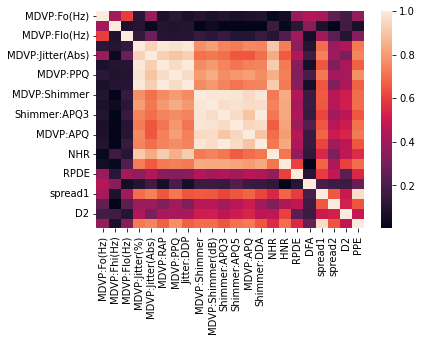

In [19]:
# create a correlation matrix
c = df[cols].corr().abs()
sns.heatmap(c)

The above correlations matrices show high correlation within the "Jitter" features, as well as within the "Shimmer" features.

<AxesSubplot:>

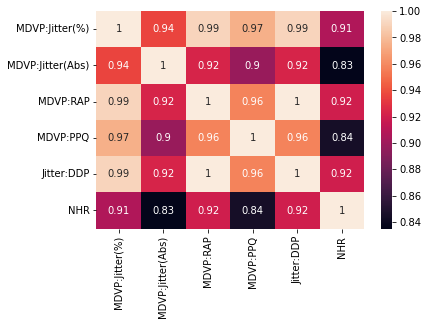

In [29]:
# Plot the paired plots for all variables measuring Jitter
jit_cols = ['MDVP:Jitter(%)', 
               'MDVP:Jitter(Abs)',
               'MDVP:RAP',
               'MDVP:PPQ',
               'Jitter:DDP']

jit_c = df[jit_cols].corr().abs()
sns.heatmap(jit_c,annot=True)

<AxesSubplot:>

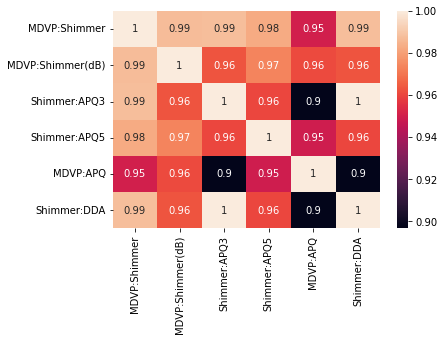

In [32]:
# Plot the paired plots for all variables measuring Jitter
shim_cols = ['MDVP:Shimmer',
                'MDVP:Shimmer(dB)',
                'Shimmer:APQ3',
                'Shimmer:APQ5',
                'MDVP:APQ',
                'Shimmer:DDA']

shim_c = df[shim_cols].corr().abs()
sns.heatmap(shim_c,annot=True)

# Clean data

The correlation matrices above show that the Jitter and Shimmer variables have very high correlations with each other. Consequently, only `MDVP:RAP` for Jitter, and `MDVP:Shimmer` for Shimmer will be included in the model. The other features are dropped:

In [46]:
drop_cols = ['MDVP:Jitter(%)', 
               'MDVP:Jitter(Abs)',
               'MDVP:PPQ',
               'Jitter:DDP',
               'MDVP:Shimmer(dB)',
               'Shimmer:APQ3',
               'Shimmer:APQ5',
               'MDVP:APQ',
               'Shimmer:DDA']

df = df.drop(drop_cols, axis=1)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:RAP,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00370,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00465,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.00544,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00502,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.00655,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Now there are 13 features left. To find highly correlated features that were missed, a new fun ????

In [48]:
from Functions import correlation as cor

corr_features = cor.correlation(df, 0.8)

# correlation.correlation

corr_features

{'HNR', 'NHR', 'PPE'}

Attribute Information:

Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

(also provided in parkinsons.names in this repository)

# Build model

# Test model

# Create ensemble model